#  Project 1 - Bee Subspecie Classification (logistic regression vs neural network approach) 

### Import relevant libraries

In [75]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
#to load matlab mat files
from scipy.io import loadmat

size = 50 #Desired size of columns and rows of each image (size*size)
img_class_threshold = 90 #Minimum amount of images from each class

## PART 1.1: Create csv with relevant data from original file

In [ ]:
relevant_columns = ['file', 'subspecies']
ds = pd.read_csv('bee_dataset/bee_data.csv', usecols=relevant_columns)
#for img in ds:
    #print(img)
ds.to_csv('bee_dataset/relevant_bee_data.csv', index=False)

## PART 1.2: Visualize relevant data

In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
tmp = ds['subspecies'].value_counts()
df = pd.DataFrame(data={'subspecie': tmp.index, 'Image Count': tmp.values})
df
fig = px.bar(df, x='subspecie', y='Image Count')
fig.show()


In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
img_heights = []
img_widths = []
for idx,file in enumerate(ds['file']):
    img_array = cv2.imread('bee_dataset/bee_imgs/'+file, cv2.IMREAD_GRAYSCALE)
    h,w = img_array.shape
    img_heights.append(h)
    img_widths.append(w)
plt.xlabel('Image width')
plt.ylabel("Image height")
plt.scatter(img_widths,img_heights,c="r",marker="x",label="Positive examples")

## PART 1.3: Transform relevant data to features and classes

In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
vector_size = size*size
features_array = []
subspecies_array = []
for idx,file in enumerate(ds['file']):
    img_array = cv2.imread('bee_dataset/bee_imgs/'+file, cv2.IMREAD_GRAYSCALE)
    h,w = img_array.shape
    if h <= size and w <= size:
        h_dif = size-h
        zeros = np.zeros((h_dif,w), dtype=int)
        img_array = np.vstack((img_array,zeros))
            
        w_dif = size-w
        zeros = np.zeros((size,w_dif), dtype=int)
        img_array = np.hstack((img_array,zeros))

        flat_img_array = img_array.flatten()
        flat_img_array = np.reshape(flat_img_array,(1,vector_size))
        flat_img_array = flat_img_array / 255

## PART 1.4: Normalize data and generate file

In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
vector_size = size*size
features_array = []
subspecies_array = []
for idx,file in enumerate(ds['file']):
    img_array = cv2.imread('bee_dataset/bee_imgs/'+file, cv2.IMREAD_GRAYSCALE)
    h,w = img_array.shape
    if h <= size and w <= size:
        h_dif = size-h
        zeros = np.zeros((h_dif,w), dtype=int)
        img_array = np.vstack((img_array,zeros))
            
        w_dif = size-w
        zeros = np.zeros((size,w_dif), dtype=int)
        img_array = np.hstack((img_array,zeros))

        flat_img_array = img_array.flatten()
        flat_img_array = np.reshape(flat_img_array,(1,vector_size))
        flat_img_array = flat_img_array / 255
        flat_img_array = flat_img_array.flatten()
        str_flat_img_array = ' '.join(map(str, flat_img_array))
        features_array.append(str_flat_img_array)
        subspecies_array.append(ds['subspecies'][idx])
        
data = {'features': features_array, 'class': subspecies_array}
df = pd.DataFrame(data=data, columns=['features', 'class'])
df.to_csv('bee_dataset/ml_data.csv', index=False)

## PART 2.0: Load normalized data

In [2]:
ds = pd.read_csv('bee_dataset/ml_data.csv')
features=ds['features']
y=ds['class']
n_examples = features.shape[0]
feature_size = size*size
X = np.empty((n_examples,feature_size), float)
for idx,f in enumerate(features):
        arr_f = np.fromstring(f, dtype=float, sep=' ')
        arr_f = np.reshape(arr_f, (1,arr_f.shape[0]))
        X[idx,:] = np.copy(arr_f)

## PART 2.1: Visualize loaded data

508


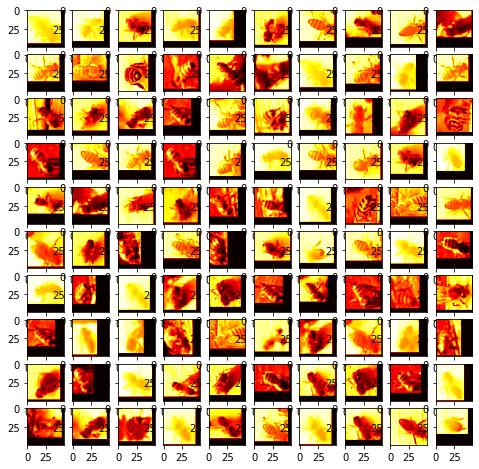

In [3]:
print(n_examples)
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
                                                        #reshape back to 20x20 pixel image
        axis[i,j].imshow(X[np.random.randint(0,n_examples),:].reshape(size,size,order="F"), cmap="hot") 

In [5]:
ds = pd.read_csv('bee_dataset/ml_data.csv')
tmp = ds['class'].value_counts()
df = pd.DataFrame(data={'class': tmp.index, 'Image Count': tmp.values})
df
fig = px.bar(df, x='class', y='Image Count')
fig.show()

Italian honey bee        191
Carniolan honey bee      115
Russian honey bee         96
1 Mixed local stock 2     92
Western honey bee         14
Name: class, dtype: int64
[191 115  96  92  14]
Index(['Italian honey bee', 'Carniolan honey bee', 'Russian honey bee',
       '1 Mixed local stock 2', 'Western honey bee'],
      dtype='object')
14


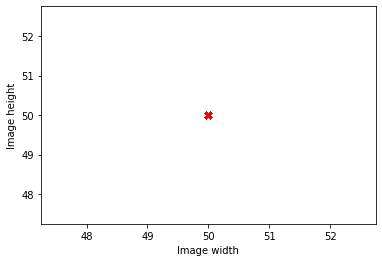

In [6]:
ds = pd.read_csv('bee_dataset/ml_data.csv')
features=ds['features']
img_heights = []
img_widths = []
for idx,f in enumerate(features):
    arr_f = np.fromstring(f, dtype=float, sep=' ')
    arr_f = np.reshape(arr_f, (size,size))
    h,w = arr_f.shape
    img_heights.append(h)
    img_widths.append(w)
plt.xlabel('Image width')
plt.ylabel("Image height")
plt.scatter(img_widths,img_heights,c="r",marker="x",label="Positive examples")

## PART 2.2: Balance data and generate file

In [73]:
ds = pd.read_csv('bee_dataset/ml_data.csv')
tmp = ds['class'].value_counts()
print(tmp)
print(tmp.index)
print(tmp.values)

short_classes_index = np.where(tmp.values == np.amin(tmp.values))[0]
short_classes = tmp.index[short_classes_index].values
print("Minimum number of images in a class: " + str(np.amin(tmp.values)) + " from class " + str(short_classes))

relevant_classes_index = np.where(tmp.values >= img_class_threshold)[0]
relevant_classes = tmp.index[relevant_classes_index].values
print("Classes with a mininum number of images equal to " + str(img_class_threshold) + ": " + str(relevant_classes))

img_class_count = np.amin(tmp.values[relevant_classes_index])
print("\nEach class will then have " + str(img_class_count) + " images")

class_dict = {}
for c in relevant_classes:
    class_dict[str(c)] = img_class_count
    
    
features=ds['features']
y=ds['class']
features_array = []
subspecies_array = []
for idx,f in enumerate(features):
    if sum(class_dict.values()) == 0:
        break
    if y[idx] in class_dict:
        if class_dict[y[idx]] > 0:
            class_dict[y[idx]] -= 1
            features_array.append(f)
            subspecies_array.append(y[idx])
            
data = {'features': features_array, 'class': subspecies_array}
df = pd.DataFrame(data=data, columns=['features', 'class'])
df.to_csv('bee_dataset/balanced_ml_data.csv', index=False)

Italian honey bee        191
Carniolan honey bee      115
Russian honey bee         96
1 Mixed local stock 2     92
Western honey bee         14
Name: class, dtype: int64
Index(['Italian honey bee', 'Carniolan honey bee', 'Russian honey bee',
       '1 Mixed local stock 2', 'Western honey bee'],
      dtype='object')
[191 115  96  92  14]
Minimum number of images in a class: 14 from class ['Western honey bee']
Classes with a mininum number of images equal to 14: ['Italian honey bee' 'Carniolan honey bee' 'Russian honey bee'
 '1 Mixed local stock 2' 'Western honey bee']

Each class will then have 14 images


## PART 2.3: Reload data

In [74]:
ds = pd.read_csv('bee_dataset/balanced_ml_data.csv')
tmp = ds['class'].value_counts()
df = pd.DataFrame(data={'class': tmp.index, 'Image Count': tmp.values})
df
fig = px.bar(df, x='class', y='Image Count')
fig.show()